In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
data=pd.read_csv("C:\Python Imarticus\Basics\CapStone Project\PythonProject-BankLending\XYZCorp_LendingData.txt",sep='\t',header=0)

In [3]:
pd.set_option("display.max_columns", None)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
print(data.shape)
print()
print(data.info())
print()
print(data.describe(include="all"))

(855969, 73)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null

#### Handling Missing Values

In [5]:
pd.set_option("display.max_rows", None)
data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [6]:
data_new=data.copy()

In [7]:
#Dropping Cols which have more than 50% missing data
colnames= data_new.columns

for i in colnames:
    if (data_new[i].isnull().sum() > (0.5*len(data_new))):
        data_new = data_new.drop(i, axis=1)
    
print(data_new.shape)
data_new.head()

(855969, 52)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0


In [8]:
data_new.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      49443
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             33
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
r

In [9]:
#Imputation of missing values
for i in data_new.columns:
    if data_new[i].isnull().sum() >0:
        if data_new[i].dtypes == "object":
            data_new[i].fillna(data_new[i].mode()[0], inplace=True)
        if ((data_new[i].dtypes=="int64") or (data_new[i].dtypes=="float64")):
            data_new[i].fillna(int(data_new[i].mean()), inplace=True)

data_new.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prnc

#### Feature Selection

In [10]:
#check uniqueness of vars
for i in data_new.columns:
    print({i: data_new[i].unique()})

{'id': array([ 1077501,  1077430,  1077175, ..., 36271333, 36490806, 36271262],
      dtype=int64)}
{'member_id': array([ 1296599,  1314167,  1313524, ..., 38982739, 39222577, 38982659],
      dtype=int64)}
{'loan_amnt': array([ 5000.,  2500.,  2400., ..., 32825., 32575., 34175.])}
{'funded_amnt': array([ 5000.,  2500.,  2400., ..., 32825., 32575., 34175.])}
{'funded_amnt_inv': array([ 4975.,  2500.,  2400., ..., 33625., 34125., 30525.])}
{'term': array([' 36 months', ' 60 months'], dtype=object)}
{'int_rate': array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 22.06, 20.89,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 2

       'Aug-1955', 'Apr-1958'], dtype=object)}
{'inq_last_6mths': array([1., 5., 2., 0., 3., 4., 6., 7., 8.])}
{'open_acc': array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42., 40.,  1., 37., 45., 49., 53., 51., 43.,  0., 62., 46., 48.,
       50., 52., 47., 58., 55., 84., 75., 54., 76., 61., 65., 67., 57.,
       66., 68., 70., 60., 56., 82., 63., 59., 64., 79., 74., 90.])}
{'pub_rec': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  9.,  8.,  7., 11., 49., 10.,
       54., 12., 18., 19., 16., 15., 14., 40., 63., 13., 21., 34., 17.,
       23., 26., 28., 86., 22.])}
{'revol_bal': array([13648.,  1687.,  2956., ..., 57516., 55667., 75645.])}
{'revol_util': array([ 83.7,   9.4,  98.5, ..., 123.3, 121.4, 184.6])}
{'total_acc': array([  9.,   4.,  10.,  37.,  38.,  12.,  11.,  13.,   3.,  23.,  34.,
        29.,  28.,  42.

In [11]:
count=(data_new.loan_amnt==data_new.funded_amnt)
count.value_counts()

True     854052
False      1917
dtype: int64

In [12]:
count=(data_new.loan_amnt==data_new.funded_amnt_inv)
count.value_counts()

True     759378
False     96591
dtype: int64

We can see that loan_amnt,funded_amnt,funded_amnt_inv are highly correlated,hence out of 3 we keep only one variable

In [13]:
data_new.drop(["funded_amnt","funded_amnt_inv"],axis=1, inplace= True)
data_new.shape

(855969, 50)

In [14]:
#Drop Irrevalant cols
data_new.drop(["sub_grade","title","zip_code","emp_title"],axis=1, inplace= True)


In [15]:
data_new.shape

(855969, 46)

In [16]:
data_new_copy=data_new.copy()

#### Data Distributions

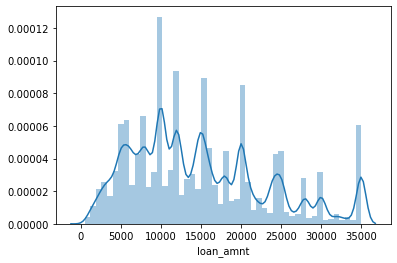

In [17]:
#loan_amnt
sns.distplot(data_new["loan_amnt"])

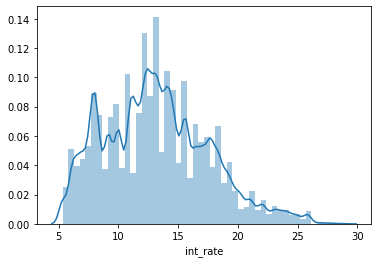

In [18]:
#int_rate
sns.distplot(data_new["int_rate"])

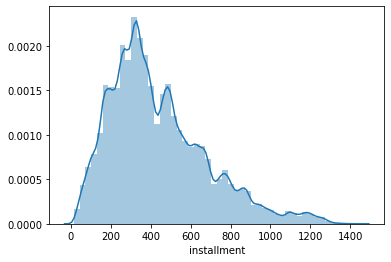

In [19]:
#installment
sns.distplot(data_new["installment"])

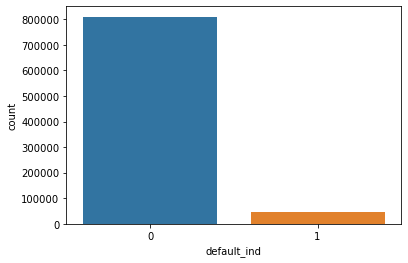

In [20]:
#default_ind
sns.countplot(data_new["default_ind"])

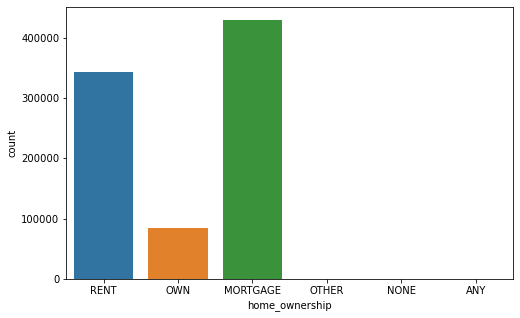

In [21]:
#home_ownership
plt.figure(figsize=(8,5))
sns.countplot(x="home_ownership",  data=data_new)

Text(0, 0.5, 'Count')

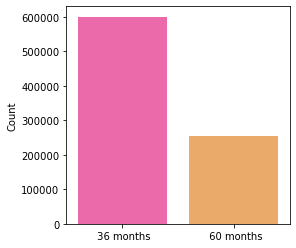

In [22]:
#Term
plt.figure(figsize=(4,4))
sns.barplot(y=data_new.term.value_counts(), x=data_new.term.value_counts().index, palette='spring')
plt.xticks(rotation=0)
plt.ylabel("Count")

Text(0.5, 1.0, 'Grade Count')

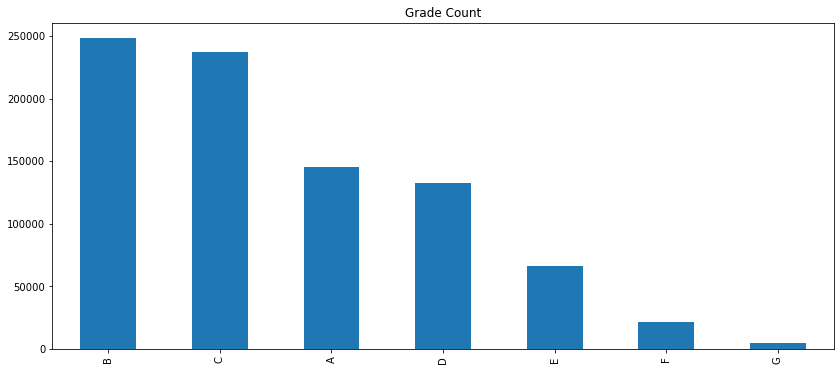

In [23]:
#Grade
plt.figure(figsize=(14, 6))
data_new.grade.value_counts().plot(kind='bar').set_title('Grade Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

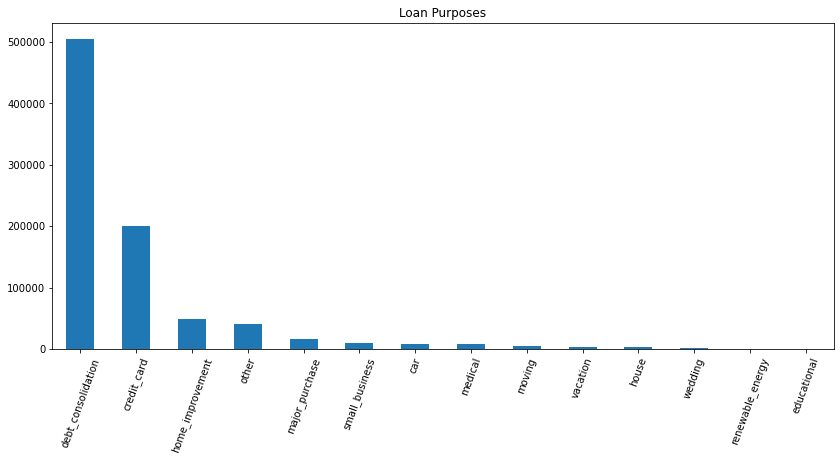

In [24]:
#Purpose
plt.figure(figsize=(14, 6))
data_new.purpose.value_counts().plot(kind='bar').set_title('Loan Purposes')
plt.xticks(rotation=70)

Loan Amount Distribution BoxPlot


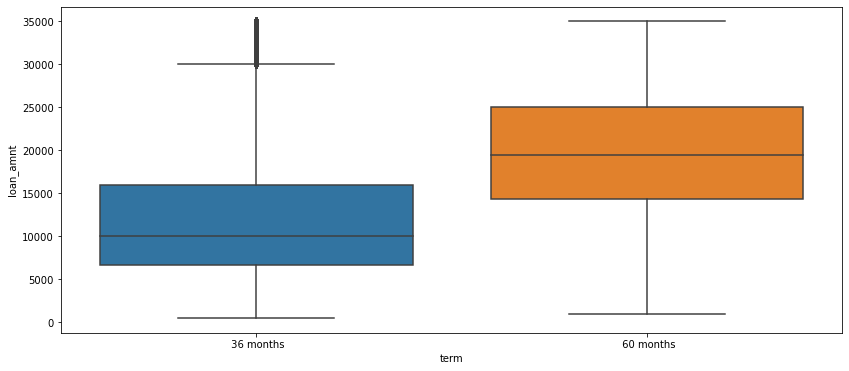

In [25]:
#Loan amt by Term
print("Loan Amount Distribution BoxPlot")
plt.figure(figsize=(14,6))
sns.boxplot(x=data_new.term, y=data_new.loan_amnt)

Text(0, 0.5, 'Loan Amount')

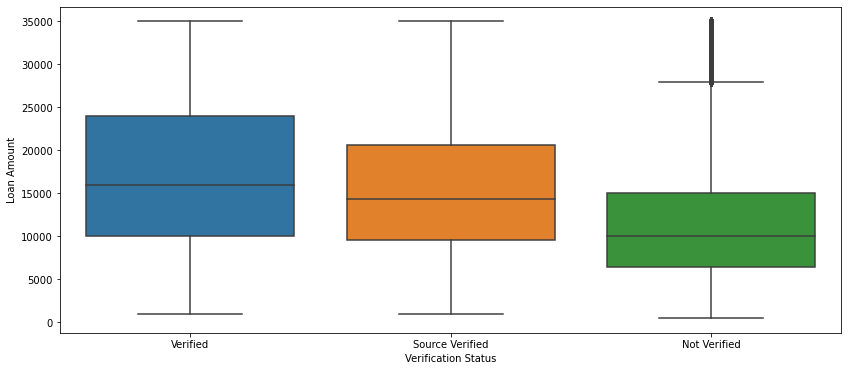

In [26]:
#Loan amt by Verification Status
plt.figure(figsize=(14,6)) 
sns.boxplot(x=data_new.verification_status, y=data_new.loan_amnt)
plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

In [27]:
#year wise distribution (from issue_d)
target_df=data_new[['default_ind']]
data_new.issue_d= pd.to_datetime(data_new.issue_d)
target_df['year']=data_new['issue_d'].dt.year

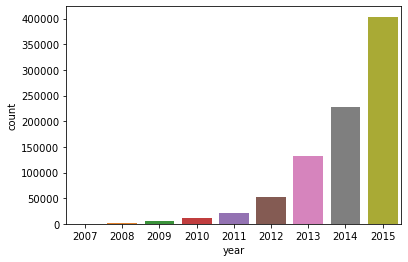

In [28]:
sns.countplot(x="year", data=target_df)

#### Label Encoding

In [29]:
colname= []
for i in data_new.columns:
    if data_new[i].dtypes=="object":
        colname.append(i)

colname

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [30]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

for x in colname:
    data_new[x]=le.fit_transform(data_new[x])
    le_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature',x)
    print('mapping',le_name_mapping)  

Feature term
mapping {' 36 months': 0, ' 60 months': 1}
Feature grade
mapping {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
Feature emp_length
mapping {'1 year': 0, '10+ years': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '< 1 year': 10}
Feature home_ownership
mapping {'ANY': 0, 'MORTGAGE': 1, 'NONE': 2, 'OTHER': 3, 'OWN': 4, 'RENT': 5}
Feature verification_status
mapping {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
Feature pymnt_plan
mapping {'n': 0, 'y': 1}
Feature purpose
mapping {'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3, 'home_improvement': 4, 'house': 5, 'major_purchase': 6, 'medical': 7, 'moving': 8, 'other': 9, 'renewable_energy': 10, 'small_business': 11, 'vacation': 12, 'wedding': 13}
Feature addr_state
mapping {'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 

Feature initial_list_status
mapping {'f': 0, 'w': 1}
Feature last_pymnt_d
mapping {'Apr-2008': 0, 'Apr-2009': 1, 'Apr-2010': 2, 'Apr-2011': 3, 'Apr-2012': 4, 'Apr-2013': 5, 'Apr-2014': 6, 'Apr-2015': 7, 'Aug-2008': 8, 'Aug-2009': 9, 'Aug-2010': 10, 'Aug-2011': 11, 'Aug-2012': 12, 'Aug-2013': 13, 'Aug-2014': 14, 'Aug-2015': 15, 'Dec-2008': 16, 'Dec-2009': 17, 'Dec-2010': 18, 'Dec-2011': 19, 'Dec-2012': 20, 'Dec-2013': 21, 'Dec-2014': 22, 'Dec-2015': 23, 'Feb-2008': 24, 'Feb-2009': 25, 'Feb-2010': 26, 'Feb-2011': 27, 'Feb-2012': 28, 'Feb-2013': 29, 'Feb-2014': 30, 'Feb-2015': 31, 'Jan-2008': 32, 'Jan-2009': 33, 'Jan-2010': 34, 'Jan-2011': 35, 'Jan-2012': 36, 'Jan-2013': 37, 'Jan-2014': 38, 'Jan-2015': 39, 'Jan-2016': 40, 'Jul-2008': 41, 'Jul-2009': 42, 'Jul-2010': 43, 'Jul-2011': 44, 'Jul-2012': 45, 'Jul-2013': 46, 'Jul-2014': 47, 'Jul-2015': 48, 'Jun-2008': 49, 'Jun-2009': 50, 'Jun-2010': 51, 'Jun-2011': 52, 'Jun-2012': 53, 'Jun-2013': 54, 'Jun-2014': 55, 'Jun-2015': 56, 'Mar-2008': 57,

In [31]:
data_new.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,0,10.65,162.87,1,1,5,24000.0,2,2011-12-01,0,1,3,27.65,0.0,263,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,1.0,0,0.0,225.0,139766.0,32163.0,0
1,1077430,1314167,2500.0,1,15.27,59.83,2,10,5,30000.0,1,2011-12-01,0,0,10,1.00,0.0,41,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,1.0,0,0.0,225.0,139766.0,32163.0,1
2,1077175,1313524,2400.0,0,15.96,84.33,2,1,5,12252.0,0,2011-12-01,0,11,14,8.72,0.0,570,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,1.0,0,0.0,225.0,139766.0,32163.0,0
3,1076863,1277178,10000.0,0,13.49,339.31,2,1,5,49200.0,1,2011-12-01,0,9,4,20.00,0.0,208,1.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,1.0,0,0.0,225.0,139766.0,32163.0,0
4,1075358,1311748,3000.0,1,12.69,67.79,1,0,5,80000.0,1,2011-12-01,0,9,37,17.94,0.0,274,0.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,1.0,0,0.0,225.0,139766.0,32163.0,0


#### Splitting Data into train and test

In [32]:

train= data_new[(data_new.issue_d<"Jun-2015")]
test = data_new[(data_new.issue_d >"May-2015")]

In [33]:
print(train.shape)
print(test.shape)

(598978, 46)
(256991, 46)


In [34]:
train=train.drop(['issue_d'],1)
test=test.drop(['issue_d'],1)

In [35]:
# Now spliting into x_train,x_test,y_train,y_test and dropping id and member id cols
X_train= train.values[: ,2:-1]
Y_train= train.values[:,-1]
X_test= test.values[:,2:-1]
Y_test= test.values[:,-1]

In [36]:
print(X_train.shape)
print(X_test.shape)

(598978, 42)
(256991, 42)


In [37]:
print(Y_train.shape)
print(Y_test.shape)

(598978,)
(256991,)


#### Scaling Data

In [38]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
print(X_train)
print(X_test)

[[-1.14444640e+00 -6.34014251e-01 -6.56815116e-01 ...  1.19380084e-03
   4.78952685e-03  2.72499521e-02]
 [-1.44433354e+00  1.57725161e+00  4.00161631e-01 ...  1.19380084e-03
   4.78952685e-03  2.72499521e-02]
 [-1.45632902e+00 -6.34014251e-01  5.58021795e-01 ...  1.19380084e-03
   4.78952685e-03  2.72499521e-02]
 ...
 [-1.84807551e-01  1.57725161e+00  5.64885280e-01 ... -1.76339950e-02
  -7.29852933e-01 -3.85911693e-01]
 [-3.04762407e-01  1.57725161e+00  1.48001666e+00 ... -1.76339950e-02
  -5.61199930e-01 -1.23364577e-01]
 [ 6.54876440e-01 -6.34014251e-01 -3.50246103e-01 ... -1.76339950e-02
  -7.35913030e-01  3.05462380e-01]]
[[ 1.25465072 -0.63401425 -1.87622768 ... -0.017634    2.03008666
   0.41631561]
 [ 0.41496673  1.57725161  1.36333741 ... -0.01261325 -0.71545759
   0.09542469]
 [-0.90453669 -0.63401425 -1.37976891 ... -0.017634   -0.58343652
   0.34922023]
 ...
 [ 1.25465072 -0.63401425  0.69300367 ... -0.017634    2.21050502
   0.5359204 ]
 [ 1.25465072 -0.63401425 -1.565083

In [39]:
Y_train=Y_train.astype(int)
Y_test= Y_test.astype(int)

### Linear Models

#### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
Y_pred= classifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print()

print("classification report:")
print(classification_report(Y_test,Y_pred))

print()

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[256573    107]
 [    65    246]]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.70      0.79      0.74       311

    accuracy                           1.00    256991
   macro avg       0.85      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of the model:  0.999330715861645


In [42]:
Y_pred_prob= classifier.predict_proba(X_test)

In [43]:
for a in np.arange(0.4,0.71,0.01):
    Y_pred_test = np.where(Y_pred_prob[:,1]>a,1,0)
    cfm=confusion_matrix(Y_test,Y_pred_test)
    total_error = cfm[0,1]+cfm[1,0]
    print("Error at threshold: ", a," : ", total_error, "Type_1 Error : ",cfm[0,1],
          "Type_2 Error : ", cfm[1,0] )

Error at threshold:  0.4  :  208 Type_1 Error :  145 Type_2 Error :  63
Error at threshold:  0.41000000000000003  :  201 Type_1 Error :  138 Type_2 Error :  63
Error at threshold:  0.42000000000000004  :  201 Type_1 Error :  138 Type_2 Error :  63
Error at threshold:  0.43000000000000005  :  194 Type_1 Error :  131 Type_2 Error :  63
Error at threshold:  0.44000000000000006  :  193 Type_1 Error :  130 Type_2 Error :  63
Error at threshold:  0.45000000000000007  :  191 Type_1 Error :  127 Type_2 Error :  64
Error at threshold:  0.4600000000000001  :  190 Type_1 Error :  126 Type_2 Error :  64
Error at threshold:  0.4700000000000001  :  184 Type_1 Error :  120 Type_2 Error :  64
Error at threshold:  0.4800000000000001  :  182 Type_1 Error :  117 Type_2 Error :  65
Error at threshold:  0.4900000000000001  :  174 Type_1 Error :  109 Type_2 Error :  65
Error at threshold:  0.5000000000000001  :  172 Type_1 Error :  107 Type_2 Error :  65
Error at threshold:  0.5100000000000001  :  170 Type_

In [44]:
y_pred_class=[]
for value in Y_pred_prob[:,1]:
    if value>0.6:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print()

print("classification report:")
print(classification_report(Y_test,y_pred_class))

print()

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)

[[256593     87]
 [    66    245]]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.74      0.79      0.76       311

    accuracy                           1.00    256991
   macro avg       0.87      0.89      0.88    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of the model:  0.9994046484118121


0.8937212035254025


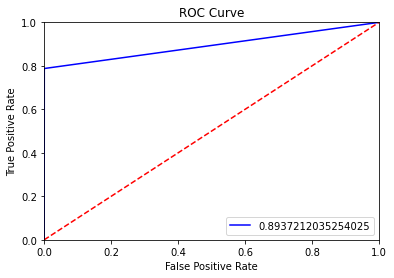

In [46]:
#Plotting ROC curve
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)


plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### SGD Classifer

In [47]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(loss='log',random_state=10, eta0=0.0, alpha=0.00001, max_iter=1000,
                          shuffle=True, early_stopping=True, n_iter_no_change=5, learning_rate="optimal")
sgd_classifier.fit(X_train, Y_train)
Y_pred=sgd_classifier.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print()

print("classification report:")
print(classification_report(Y_test,Y_pred))

print()

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[256395    285]
 [    65    246]]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.46      0.79      0.58       311

    accuracy                           1.00    256991
   macro avg       0.73      0.89      0.79    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of the model:  0.9986380846021845


In [49]:
#alpha= 0.01 >> acc= 99.93     type2=160  type1=4
#alpha= 0.001 >> acc= 99.94    type2= 93  type1= 54
#alpha= 0.0001 >> acc= 99.94   type2=73   type1=63
#alpha= 0.00001 >> acc= 99.86  type2=65   type1=285

#### Cross Validation

In [50]:
classifier=LogisticRegression()

from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=5)

from sklearn.model_selection import cross_val_score
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,y=Y_train, cv=kfold_cv)

print(kfold_cv_result)
print()
print(kfold_cv_result.mean())

[0.98484924 0.99213663 0.99654413 0.99663592 0.99719521]

0.9934722258358011


In [51]:
#Lets build model and see the accuracy

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

Y_pred=classifier.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print()

print("classification report:")
print(classification_report(Y_test,Y_pred))

print()

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[256530    150]
 [    63    248]]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.62      0.80      0.70       311

    accuracy                           1.00    256991
   macro avg       0.81      0.90      0.85    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of the model:  0.999171177200758


### Tree based Models

#### Decision Tree 

In [53]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(criterion="gini",random_state=10)
model_dt.fit(X_train,Y_train)
Y_pred=model_dt.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print()

print("classification report:")
print(classification_report(Y_test,Y_pred))

print()

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[250725   5955]
 [     9    302]]

classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.05      0.97      0.09       311

    accuracy                           0.98    256991
   macro avg       0.52      0.97      0.54    256991
weighted avg       1.00      0.98      0.99    256991


Accuracy of the model:  0.9767929616212241


In [55]:
#Pruning DT with changing parameters
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(criterion="gini",max_depth=10,min_samples_leaf=5,max_leaf_nodes=200,random_state=10)
model_dt.fit(X_train,Y_train)
Y_pred=model_dt.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print()

print("classification report:")
print(classification_report(Y_test,Y_pred))

print()

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[256675      5]
 [    10    301]]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.98      0.97      0.98       311

    accuracy                           1.00    256991
   macro avg       0.99      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of the model:  0.9999416321972365


In [57]:
#Visualisation of DT
from sklearn import tree
with open ("C:\Python Imarticus\Basics\CapStone Project\PythonProject-BankLending\Decision_Tree.txt","w") as f:
    f=tree.export_graphviz(model_dt, feature_names=data_new.columns[3:-1], out_file=f)

Once File is generated upload the code in webgraphviz.com to plot the decision tree

In [58]:
#Saving O/p to file
data_new_copy.issue_d= pd.to_datetime(data_new_copy.issue_d)
predicted_test_data = data_new_copy[(data_new_copy.issue_d>"May-2015")]

predicted_test_data["Predicted_defaulters"]=Y_pred
predicted_test_data
predicted_test_data.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Predicted_defaulters
452272,68587652,73477494,25000.0,36 months,5.32,752.87,A,1 year,MORTGAGE,150000.0,Not Verified,2015-12-01,n,credit_card,VT,9.54,0.0,Feb-1996,0.0,7.0,0.0,19339.0,42.5,18.0,w,24357.97,24357.97,682.67,682.67,642.03,40.64,0.0,0.0,0.0,Jan-2016,701.14,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,430856.0,45500.0,0,0
452273,66624733,71350547,18000.0,60 months,19.48,471.70,E,7 years,RENT,150000.0,Not Verified,2015-12-01,n,debt_consolidation,CA,9.39,0.0,Jun-2005,1.0,18.0,1.0,14052.0,40.7,27.0,w,17820.50,17820.50,286.64,286.64,179.50,107.14,0.0,0.0,0.0,Jan-2016,335.34,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,60.0,36247.0,34500.0,0,0
452274,68446769,73336592,7000.0,36 months,7.49,217.72,A,10+ years,MORTGAGE,59000.0,Not Verified,2015-12-01,n,credit_card,MD,13.06,1.0,Oct-1996,1.0,10.0,0.0,10467.0,24.2,34.0,w,7000.00,7000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,Jan-2016,0.00,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,55222.0,43200.0,0,0
452275,68595206,73484978,20000.0,36 months,17.97,722.75,D,7 years,MORTGAGE,180000.0,Not Verified,2015-12-01,n,debt_consolidation,TX,25.10,0.0,Apr-1989,0.0,13.0,0.0,59126.0,92.1,30.0,w,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,Jan-2016,0.00,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,418.0,277227.0,64200.0,0,0
452276,68587491,73477331,15000.0,36 months,6.99,463.09,A,2 years,MORTGAGE,93000.0,Not Verified,2015-12-01,n,credit_card,MA,14.86,0.0,Oct-1993,1.0,8.0,0.0,14914.0,43.2,17.0,w,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,Jan-2016,0.00,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,306430.0,34500.0,0,0


In [59]:
predicted_test_data.to_csv(r"C:\Python Imarticus\Basics\CapStone Project\PythonProject-BankLending\BankLending_predicted_test_data.csv", index= True)

#### Model Dumping 

In [60]:
import pickle

filename = r'C:\Python Imarticus\Basics\CapStone Project\PythonProject-BankLending\BankLending_Project_model.sav'
pickle.dump(model_dt, open(filename, 'wb'))

In [61]:
# load the model from disk to predict in run time

#loaded_model = pickle.load(open(filename, 'rb'))
#Y_pred=loaded_model.predict(X_test) 
#result = loaded_model.score(X_train, Y_train)
#print(result)

##### Bagging Techniques

#### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
model_rd=RandomForestClassifier(n_estimators=100,random_state=10)
model_rd.fit(X_train,Y_train)
Y_pred=model_rd.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print()

print("classification report:")
print(classification_report(Y_test,Y_pred))

print()

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[203133  53547]
 [     1    310]]

classification report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88    256680
           1       0.01      1.00      0.01       311

    accuracy                           0.79    256991
   macro avg       0.50      0.89      0.45    256991
weighted avg       1.00      0.79      0.88    256991


Accuracy of the model:  0.7916347265079322


In [64]:
#for 50 estimtors type1 err: 51569  type2 err:2 acc: 79.93
#for 100 estimators type1 err: 53547 type2 err:1 acc:79.16

#Accuracy is dropping and type1 error is more,hence we go for better model

#### Extra trees Classifier

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
model_dt=ExtraTreesClassifier(n_estimators=100,random_state=10,max_depth=10)
model_dt=model_dt.fit(X_train,Y_train)
Y_pred=model_dt.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print()

print("classification report:")
print(classification_report(Y_test,Y_pred))

print()

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[256679      1]
 [   199    112]]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.99      0.36      0.53       311

    accuracy                           1.00    256991
   macro avg       1.00      0.68      0.76    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of the model:  0.9992217626298198


In [67]:
#for 10 type2 err: 141 type1:1481 acc:99.36
#for 50 type2 err: 207 type1 :0   acc:99.91
#for 100 type2 err: 199 type1 :1  acc:99.92
#for 500 type2 err: 213   type1:0   acc:99.91

#Type2 error remains high for different n_estimators,hence not considering this one


##### Boosting Techniques

#### Gradient boosting classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
model_GradientBoosting=GradientBoostingClassifier(n_estimators=130,random_state=10)
model_GradientBoosting.fit(X_train,Y_train)
Y_pred=model_GradientBoosting.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print()

print("classification report:")
print(classification_report(Y_test,Y_pred))

print()

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[256615     65]
 [    10    301]]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.82      0.97      0.89       311

    accuracy                           1.00    256991
   macro avg       0.91      0.98      0.94    256991
weighted avg       1.00      1.00      1.00    256991


Accuracy of the model:  0.9997081609861824


In [70]:
#for 50 estimators type1: 74 type2:11 acc:99.96 precision value for 1 is 0.80  
#for 100 estimators type1: 63 type2:10 acc:99.71 precision value for 1 is 0.83
#for 130 estimators type1: 65 type2:10 acc:99.97 precision value for 1 is 0.82
#for 150 estimators type1: 1586 type2:10 acc:99.38 precision value for 1 is 0.16

We can choose pruned decision Tree Model as we get min error and good accuracy compared to all other models.

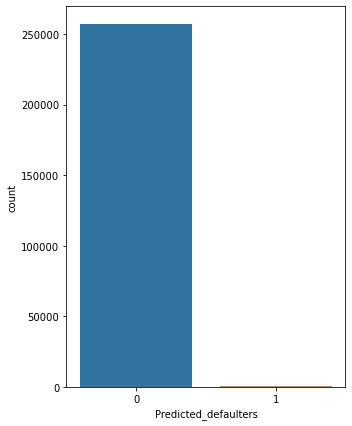

In [71]:
#predicted defaulters 
fig = plt.figure(figsize=(5,7))
sns.countplot(predicted_test_data["Predicted_defaulters"])